# Рубежный контроль №1

# Тема: Технологии разведочного анализа и обработки данных

# Евсеев Г.А. РТ5-61Б.

### Загрузка бибилиотек

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [3]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.shape

(500, 9)

Переименуем столбцы для более удобного использования

In [21]:
data = data.rename(columns={"Serial No.": "ID", "GRE Score":"GRE","TOEFL Score":"TOEFL","University Rating":"URating","Chance of Admit ":"CoA"})

In [22]:
data.describe()

,ID,GRE,TOEFEL,URating,SOP,LOR,CGPA,Research,CoA
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [16]:
data.isnull().sum()

ID                  0
GRE                 0
TOEFEL              0
URating             0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

Пропуски в данных отсуствуют, соответственно удаление столбцов не требуется.

In [23]:
data['CoA'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

Для построение модели используем поле Chance of Admit

## Визуализация

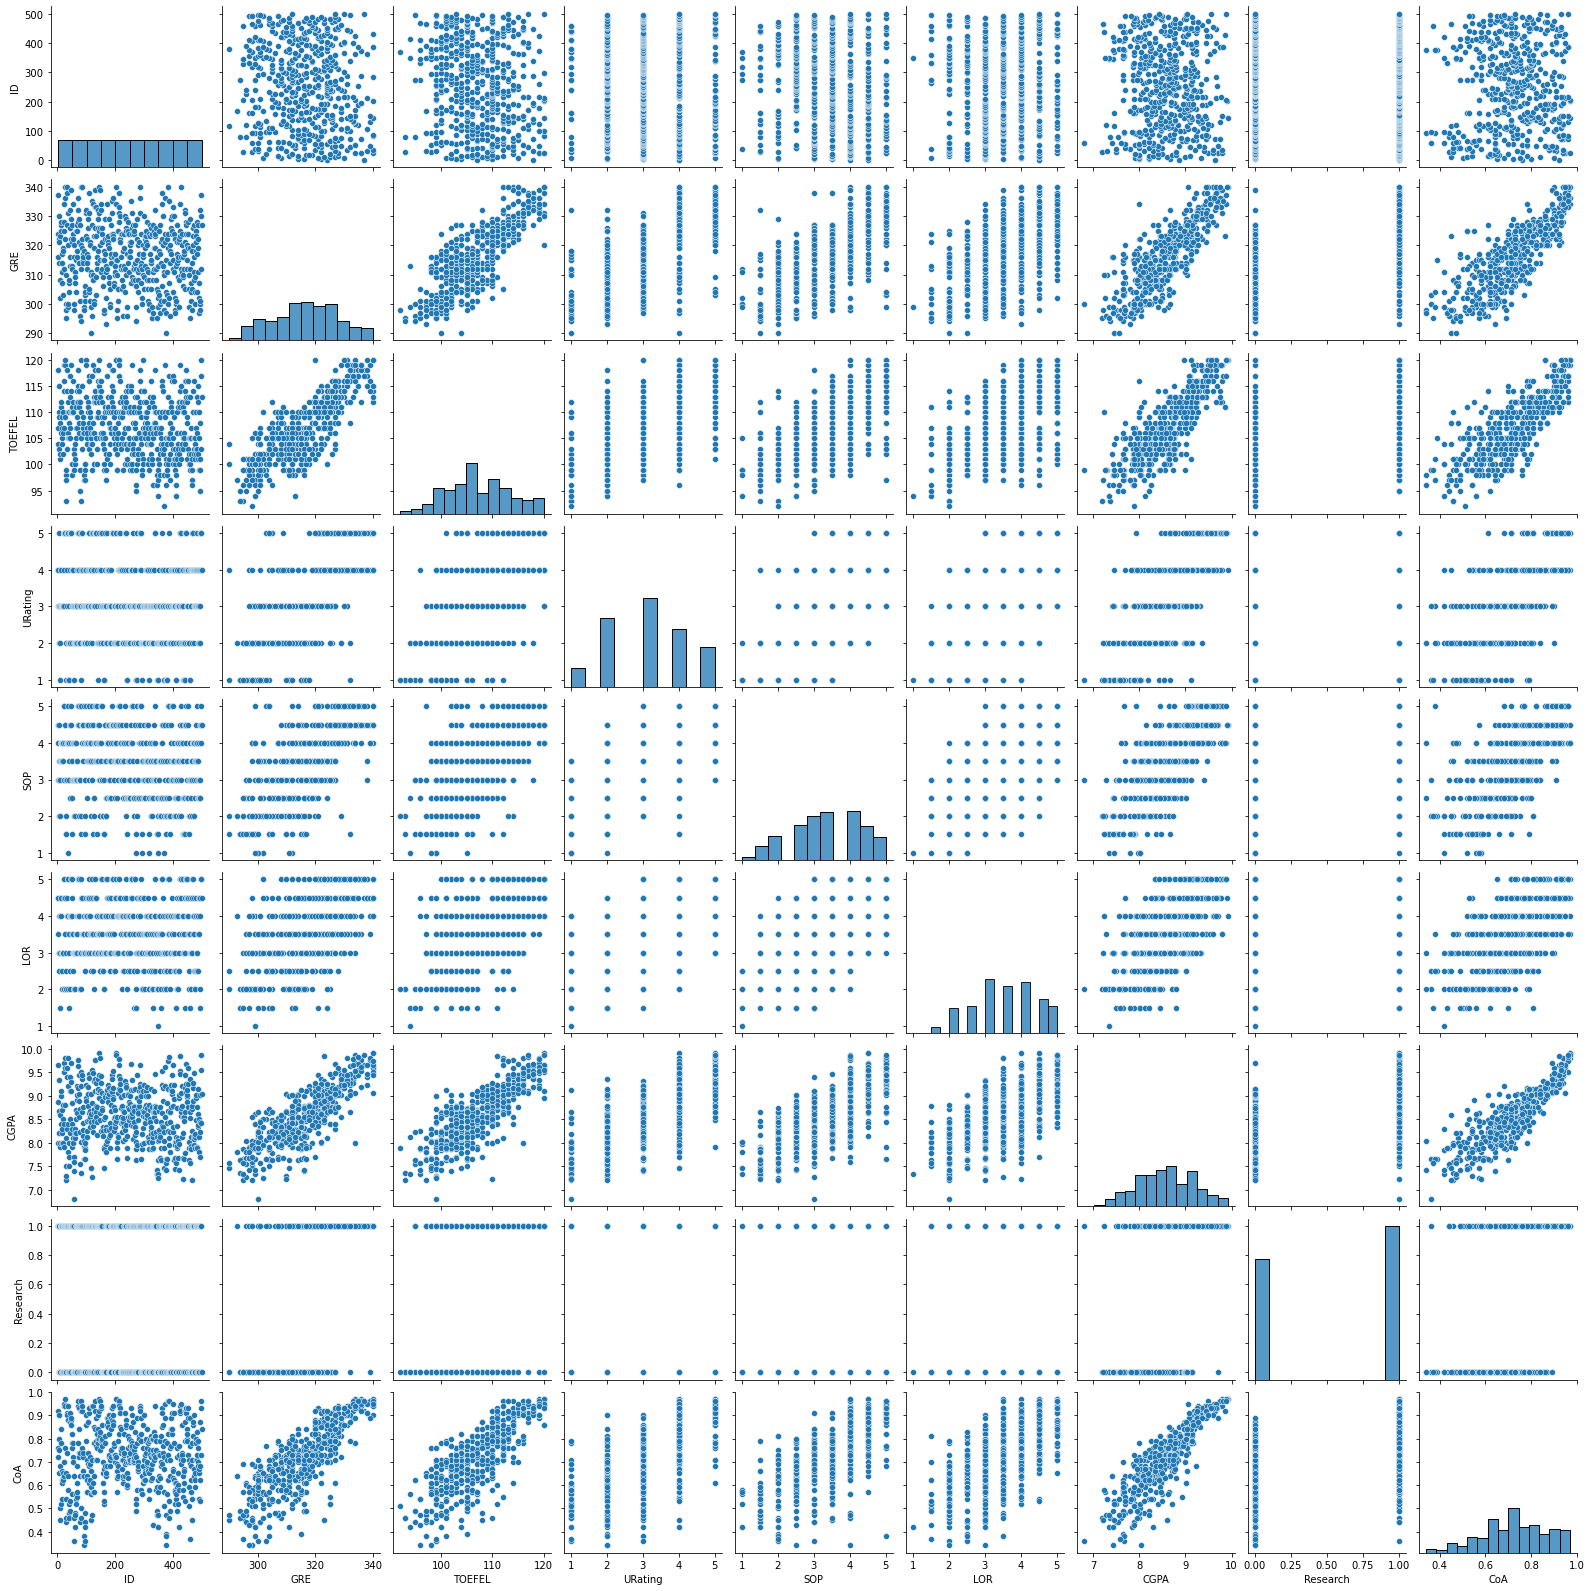

In [24]:
sns.pairplot(data)

Используя парные графики, можно наблюдать корреляцию полей.

## Корреляционный анализ

In [26]:
data.corr()

,ID,GRE,TOEFEL,URating,SOP,LOR,CGPA,Research,CoA
ID,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFEL,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
URating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
CoA,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Для большей наглядности построим тепловую карту

<AxesSubplot:>

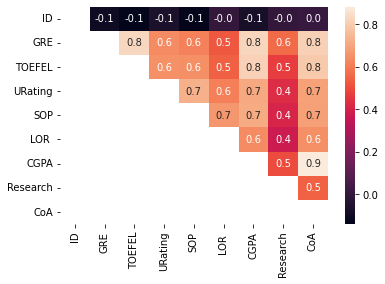

In [29]:
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.1f')

Отсюда видим, что поле ID неинформативно, поэтому от него можно избавиться.

In [30]:
df = data.drop('ID', axis=1)

<AxesSubplot:>

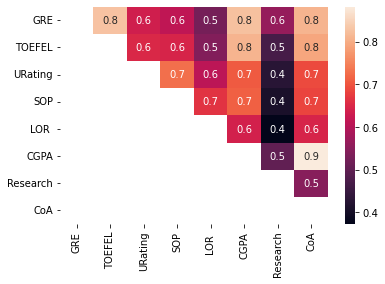

In [31]:
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')